<a href="https://colab.research.google.com/github/charanchandu/ECE539_FinalProject/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
senti_df = pd.read_csv('finalSentimentdata2.csv')

In [ ]:
senti_df

,Unnamed: 0,sentiment,text
0,3204,sad,agree the poor in india are treated badly thei...
1,1431,joy,if only i could have spent the with this cutie...
2,654,joy,will nature conservation remain a priority in ...
3,2530,sad,coronavirus disappearing in italy show this to...
4,2296,sad,uk records lowest daily virus death toll since...
...,...,...,...
3085,2579,sad,today at 02 30pm a 54 year old bangladeshi mal...
3086,3579,anger,corona virus i implore that you cease activity...
3087,221,joy,issa date once lockdown ends inshaallah (and c...
3088,2705,sad,the death toll due to covid 19 rose to 31 in j...


In [ ]:
senti_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3090 entries, 0 to 3089
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3090 non-null   int64 
 1   sentiment   3090 non-null   object
 2   text        3090 non-null   object
dtypes: int64(1), object(2)
memory usage: 72.5+ KB


In [ ]:
senti_df['sentiment'].nunique

<bound method IndexOpsMixin.nunique of 0         sad
1         joy
2         joy
3         sad
4         sad
        ...  
3085      sad
3086    anger
3087      joy
3088      sad
3089      sad
Name: sentiment, Length: 3090, dtype: object>

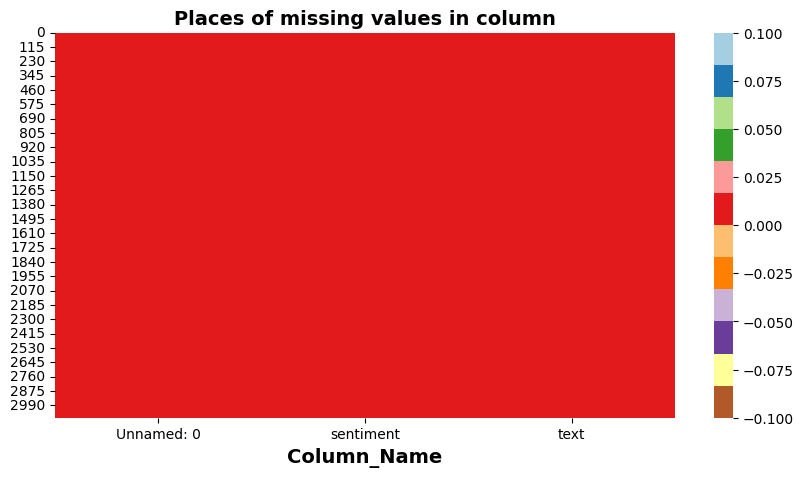

In [ ]:
import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.graph_objs as go
import plotly.express    as px
import nltk
import re
import string
plt.figure(figsize=(10, 5))
sns.heatmap(senti_df.isnull(), cbar=True, cmap='Paired_r')
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=14)
plt.show()

In [ ]:
from scipy.stats import norm
from wordcloud   import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

from textblob import TextBlob
import re
from collections import Counter

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from IPython.display import Markdown as md
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download('stopwords')
punc = string.punctuation
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
def clean_text(text):
    # Make text lowercase
    text = text.lower()

    # Remove text in square brackets, links, punctuation, and words containing numbers
    pattern = r'\[.*?\]|\bhttps?://\S+|www\.\S+|<.*?>+|[{}]|\w*\d\w*'.format(re.escape(punc))
    text = re.sub(pattern, '', text)

    # Remove stopwords and perform lemmatization and stemming
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    text = " ".join([stemmer.stem(word) for word in words])

    return text

senti_df['text'] = senti_df['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
import re

emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

def remove_emoji(text):
    return emoji_pattern.sub(r'', text)

senti_df['text'] = senti_df['text'].apply(remove_emoji)


In [ ]:
senti_df.head()

,Unnamed: 0,sentiment,text
0,3204,sad,agre poor india treat badli poor seek live sin...
1,1431,joy,could spent cuti vc sakshi n g h coast cross r...
2,654,joy,natur conserv remain prioriti post corona bang...
3,2530,sad,coronaviru disappear itali show intellectu say...
4,2296,sad,uk record lowest daili viru death toll sinc st...


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into Training and Testing sets
train, test = train_test_split(senti_df, test_size=0.2, random_state=0, stratify=senti_df.sentiment.values)

# Splitting the Training set into Training and Validation sets
train, valid = train_test_split(train, test_size=0.2, random_state=0, stratify=train.sentiment.values)

print("train shape:", train.shape)
print("valid shape:", valid.shape)
print("test shape:", test.shape)


train shape: (1977, 3)
valid shape: (495, 3)
test shape: (618, 3)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error='replace', stop_words=list(stop))  # Convert the set to a list

X_train = vectorizer.fit_transform(train['text'].values)
X_valid = vectorizer.transform(valid['text'].values)

y_train = train['sentiment'].values
y_valid = valid['sentiment'].values

print(f"X_train.shape: {X_train.shape}")
print(f"X_valid.shape: {X_valid.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_valid.shape: {y_valid.shape}")


X_train.shape: (1977, 5753)
X_valid.shape: (495, 5753)
y_train.shape: (1977,)
y_valid.shape: (495,)


In [ ]:

!pip install translate
from translate import Translator
import random
import pandas as pd
nltk.download('punkt')
# Assuming you have already loaded your dataset into a DataFrame 'senti_df' with 'text' and 'sentiment' columns
# senti_df = pd.read_csv('your_dataset.csv')
def synonym_replacement(text, n=1):
    words = nltk.word_tokenize(text)
    new_words = words.copy()
    random_word_list = list(set([word for word in words if word.lower() not in nltk.corpus.stopwords.words('english')]))
    random.shuffle(random_word_list)
    num_replaced = 0
    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        if len(synonyms) >= n:
            synonym = random.choice(list(synonyms))
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n:
            break
    return ' '.join(new_words)

# Function to get synonyms of a word using NLTK WordNet
def get_synonyms(word):
    synonyms = set()
    for syn in nltk.corpus.wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonym = lemma.name().replace("_", " ").replace("-", " ").lower()
            synonym = "".join([char for char in synonym if char in ' qwertyuiopasdfghjklzxcvbnm'])
            synonyms.add(synonym)
    if word in synonyms:
        synonyms.remove(word)
    return list(synonyms)

# Function to perform back-translation for a given text
def back_translation(text, language='fr'):
    translator = Translator(to_lang=language)
    translation = translator.translate(text)
    return translation
def augment_data(df, n_synonyms=2, back_translation_language='fr'):
    augmented_data = []
    for index, row in df.iterrows():
        original_text = row['text']
        original_sentiment = row['sentiment']

        # Augment using synonym replacement
        for _ in range(n_synonyms):
            augmented_text = synonym_replacement(original_text, n=n_synonyms)
            augmented_data.append({'text': augmented_text, 'sentiment': original_sentiment})

        # Augment using back-translation
        augmented_text_back_translation = back_translation(original_text, language=back_translation_language)
        augmented_data.append({'text': augmented_text_back_translation, 'sentiment': original_sentiment})

    augmented_df = df.append(augmented_data, ignore_index=True)
    return augmented_df

# Example of data augmentation
augmented_df = augment_data(senti_df, n_synonyms=2, back_translation_language='fr')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
train, test = train_test_split(augmented_df, test_size=0.2, random_state=42, stratify=augmented_df['sentiment'])
train, valid = train_test_split(train, test_size=0.2, random_state=42, stratify=train['sentiment'])

# Separate features and labels for training, validation, and testing sets
X_train = train['text'].values
y_train = train['sentiment'].values
X_valid = valid['text'].values
y_valid = valid['sentiment'].values
X_test = test['text'].values
y_test = test['sentiment'].values

# Print the size of each dataset
print("Training dataset size:", len(train))
print("Validation dataset size:", len(valid))
print("Testing dataset size:", len(test))


Training dataset size: 7910
Validation dataset size: 1978
Testing dataset size: 2472


In [ ]:
# Create a pipeline combining CountVectorizer and MultinomialNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(decode_error='replace', stop_words='english')),
    ('classifier', MultinomialNB())
])

# Hyperparameter tuning using GridSearchCV
parameters = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],  # Consider unigrams and bigrams
    'classifier__alpha': [0.1, 0.5, 1.0]         # Smoothing parameter for MultinomialNB
}

grid_search = GridSearchCV(pipeline, parameters, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_


In [ ]:
# Train the best model on the entire training set
best_model.fit(X_train, y_train)

# Predict on the validation set
y_valid_pred = best_model.predict(X_valid)

# Predict on the testing set
y_test_pred = best_model.predict(X_test)

# Calculate accuracy on the validation and testing sets
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print results
print("Training accuracy Score: ", best_model.score(X_train, y_train))
print("Validation accuracy Score: ", valid_accuracy)
print("Testing accuracy Score: ", test_accuracy)

print("Validation Classification Report:")
print(classification_report(y_valid, y_valid_pred))

print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))


Training accuracy Score:  0.8487989886219974
Validation accuracy Score:  0.7573306370070778
Testing accuracy Score:  0.7633495145631068
Validation Classification Report:
              precision    recall  f1-score   support

       anger       0.73      0.70      0.72       491
        fear       0.69      0.80      0.74       513
         joy       0.72      0.80      0.76       465
         sad       0.94      0.73      0.82       509

    accuracy                           0.76      1978
   macro avg       0.77      0.76      0.76      1978
weighted avg       0.77      0.76      0.76      1978

Testing Classification Report:
              precision    recall  f1-score   support

       anger       0.75      0.74      0.74       614
        fear       0.72      0.80      0.76       641
         joy       0.69      0.81      0.75       581
         sad       0.94      0.71      0.81       636

    accuracy                           0.76      2472
   macro avg       0.78      0.76     

In [ ]:
# Save the augmented DataFrame to a CSV file
augmented_df.to_csv('augmented_dataset.csv', index=False)


In [ ]:
import os

# List the contents of the current working directory
current_directory = '/content/'  # Change this if your working directory is different
file_list = os.listdir(current_directory)
print(file_list)



['.config', 'augmented_dataset.csv', 'finalSentimentdata2.csv', 'sample_data']
